# Import needed package

In [55]:
import matplotlib.pyplot as plt
import numpy as np

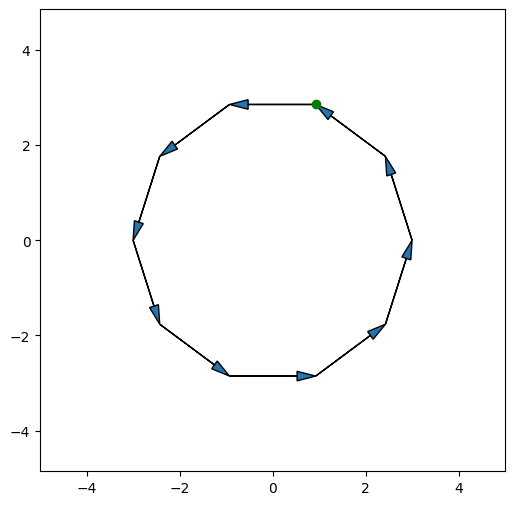

In [162]:
def draw_samples(samples):
    fig, ax = plt.subplots(figsize=(4, 4))
    plt.xlim([np.min(samples[:, 0])-2, np.max(samples[:, 0])+2])
    plt.ylim([np.min(samples[:, 1])-2, np.max(samples[:, 1])+2])
    # start point
    # ax.scatter(samples[0, 0], samples[0, 1], c = "green")
    ax.scatter(samples[:, 0], samples[:, 1])
    
    # ax.plot(samples[:, 0], samples[:, 1])
    plt.show()

def draw_path(points):
    fig, ax = plt.subplots(figsize=(6, 6))
    plt.xlim([np.min(points[:, 0])-2, np.max(points[:, 0])+2])
    plt.ylim([np.min(points[:, 1])-2, np.max(points[:, 1])+2])
    for i in range(len(points) - 1):
        p1, p2 = points[i], points[i + 1]
        plt.arrow(*p1, *(p2-p1), length_includes_head = True, head_width=0.2, head_length=0.4,  fill=True)
    # start point
    ax.scatter(points[0, 0], points[0, 1], c = 'green')
    plt.show()

draw_path(circle_path)

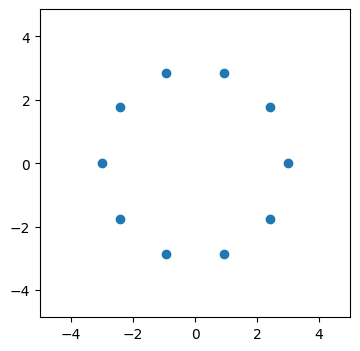

In [131]:
def generate_circle_points(center =(0, 0), radius = 1, num = 10):
    center_x, center_y = center
    radians = np.linspace(0, 2 * np.pi, num, endpoint = False)
    samples = np.zeros(shape=(num, 2))
    samples[:, 0] = center_x + np.cos(radians) * radius
    samples[:, 1] = center_y + np.sin(radians) * radius
    return samples

circle_samples =generate_circle_points(radius = 3, num = 10)
draw_samples(circle_samples)

In [126]:
def distance(p1, p2):
    return np.linalg.norm(p1 - p2)

distance(np.array((0, 0)), np.array((1, 1)))

1.4142135623730951

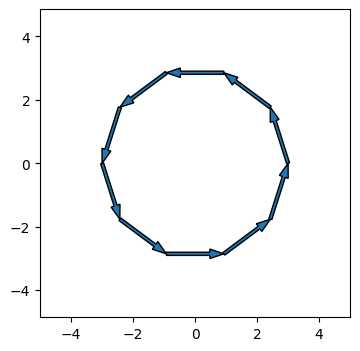

In [132]:

def greedy_solution(points, start_index):
    visit_sequence = [start_index]
    start_point = points[start_index]
    need_visit = set(range(len(points)))
    need_visit.remove(start_index)
    last_visit = start_index
    while len(need_visit) > 0:
        indexs = list(need_visit)
        need_visit_points = points[indexs]
        dists = np.apply_along_axis(lambda p: distance(p, points[last_visit]),  1, need_visit_points)
        next_index = indexs[np.argmin(dists)]
        need_visit.remove(next_index)
        visit_sequence.append(next_index)
        last_visit = next_index
        
    visit_sequence.append(start_index)
    return points[visit_sequence]

circle_path = greedy_solution(circle_samples, 2)
draw_path(circle_path)